In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import pydotplus
import time
from sklearn import tree
from sklearn import ensemble
from sklearn.model_selection import cross_val_score
from IPython.display import Image
%matplotlib inline

In [2]:
df = pd.read_csv("/Users/elijahwoolford/Desktop/python /countries of the world.csv")
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


In [3]:
#Cleaning

df["Pop. Density (per sq. mi.)"] = df["Pop. Density (per sq. mi.)"].apply(lambda x: float(re.sub(",", ".", str(x))))
df["Pop. Density (per sq. mi.)"] = df["Pop. Density (per sq. mi.)"].fillna(df["Pop. Density (per sq. mi.)"].mean())

df["Coastline (coast/area ratio)"] = df["Coastline (coast/area ratio)"].apply(lambda x: float(re.sub(",", ".", str(x))))
df["Coastline (coast/area ratio)"] = df["Coastline (coast/area ratio)"].fillna(df["Coastline (coast/area ratio)"].mean())

df["Net migration"] = df["Net migration"].apply(lambda x: float(re.sub(",", ".", str(x))))
df["Net migration"] = df["Net migration"].fillna(df["Net migration"].mean())

df["Arable (%)"] = df["Arable (%)"].apply(lambda x: float(re.sub(",", ".", str(x))))
df["Arable (%)"] = df["Arable (%)"].fillna(df["Arable (%)"].mean())

df["Crops (%)"] = df["Crops (%)"].apply(lambda x: float(re.sub(",", ".", str(x))))
df["Crops (%)"] = df["Crops (%)"].fillna(df["Crops (%)"].mean())

df["Literacy (%)"] = df["Literacy (%)"].apply(lambda x: float(re.sub(",", ".", str(x))))
df["Literacy (%)"] = df["Literacy (%)"].fillna(df["Literacy (%)"].mean())

df["GDP ($ per capita)"] = df["GDP ($ per capita)"].apply(lambda x: float(re.sub(",", ".", str(x))))
df["GDP ($ per capita)"] = df["GDP ($ per capita)"].fillna(df["GDP ($ per capita)"].mean())

df["Climate"] = df["Climate"].apply(lambda x: float(re.sub(",", ".", str(x))))
df["Climate"] = df["Climate"].fillna(df["Climate"].mean())

In [4]:
df.drop(["Infant mortality (per 1000 births)", "Phones (per 1000)", "Other (%)", "Birthrate", "Deathrate", 
         "Agriculture", "Industry", "Service"], 1, inplace=True)

In [5]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,GDP ($ per capita),Literacy (%),Arable (%),Crops (%),Climate
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,700.0,36.0,12.13,0.22,1.0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,4500.0,86.5,21.09,4.42,3.0
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,6000.0,70.0,3.22,0.25,1.0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,8000.0,97.0,10.00,15.00,2.0
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,19000.0,100.0,2.22,0.00,3.0


In [6]:
avg = df["GDP ($ per capita)"].mean()
df["GDP Cat"] = df["GDP ($ per capita)"].apply(lambda x: 1 if x >= avg  else 0)
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,GDP ($ per capita),Literacy (%),Arable (%),Crops (%),Climate,GDP Cat
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,700.0,36.0,12.13,0.22,1.0,0
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,4500.0,86.5,21.09,4.42,3.0,0
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,6000.0,70.0,3.22,0.25,1.0,0
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,8000.0,97.0,10.00,15.00,2.0,0
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,19000.0,100.0,2.22,0.00,3.0,1


In [19]:
def decision_tree():

    df_features = df.drop(["Climate","Country","Region"],1)
    df_pred = df["GDP Cat"]

    decision_tree = tree.DecisionTreeClassifier(
        criterion='entropy',
        max_features=2,
        max_depth=4,
        random_state = 1337
    )
    decision_tree.fit(df_features, df_pred)

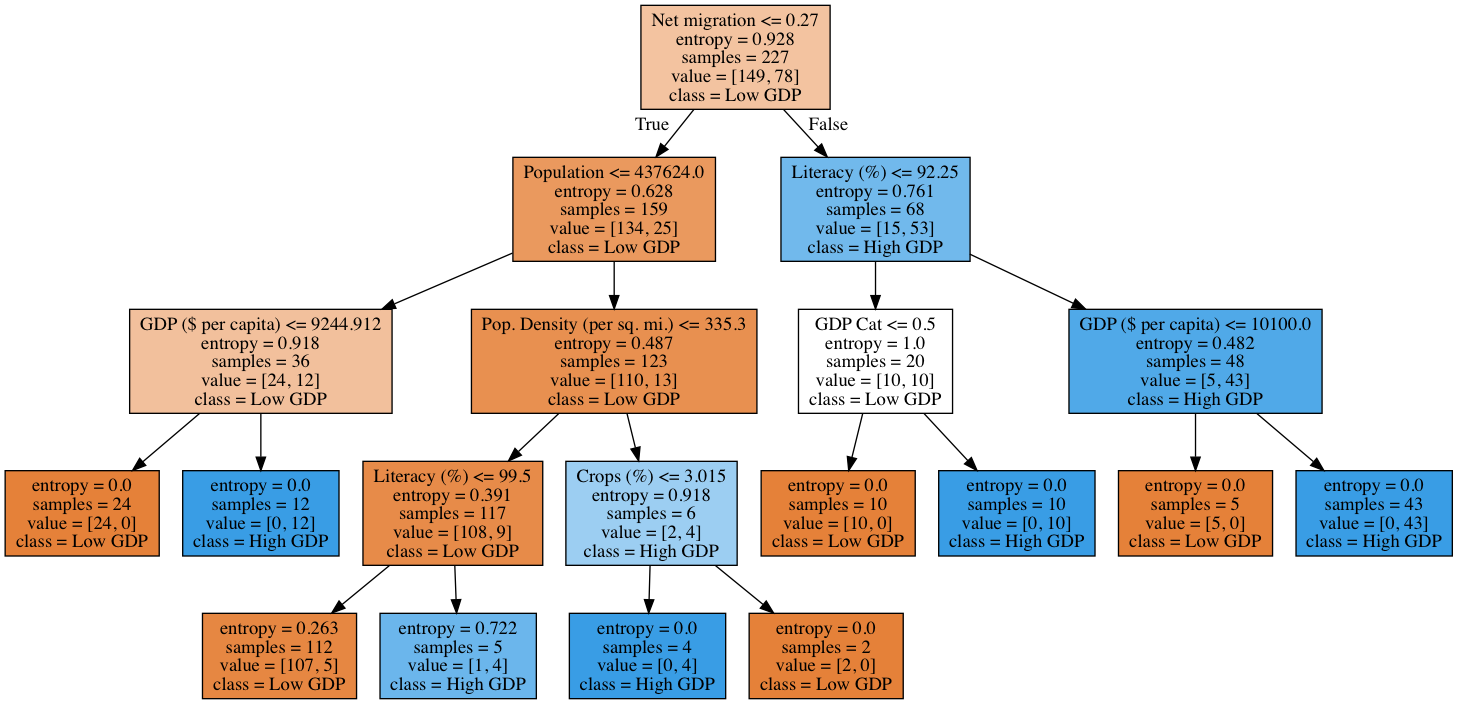

In [11]:
dot_data = tree.export_graphviz(
    decision_tree, out_file=None,
    feature_names=df_features.columns,
    class_names=['Low GDP', 'High GDP'],
    filled=True
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [18]:
def random_classifier():
    df_features = df.drop(["Country","Region"],1)
    df_pred = df["GDP Cat"]

    rfc = ensemble.RandomForestClassifier()
    cross_val_score(rfc, df_features, df_pred, cv=5)

In [23]:
start_time = time.time()
decision_tree()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.004539966583251953 seconds ---


In [22]:
start_time = time.time()
random_classifier()
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.16767597198486328 seconds ---


The random classifier although is more efficient is slower than the decision tree.